In [1]:
# Importing necessary libraries 
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Importing data
relationship_df = pd.read_csv('country_relationship.csv', index_col = 0)

In [3]:
# Preview data 
relationship_df.head(5)

,source,target,value
0,France,Italy,10
1,Italy,Russia,6
2,Germany,Russia,26
3,Bulgaria,Germany,6
4,Bulgaria,Russia,5


In [4]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

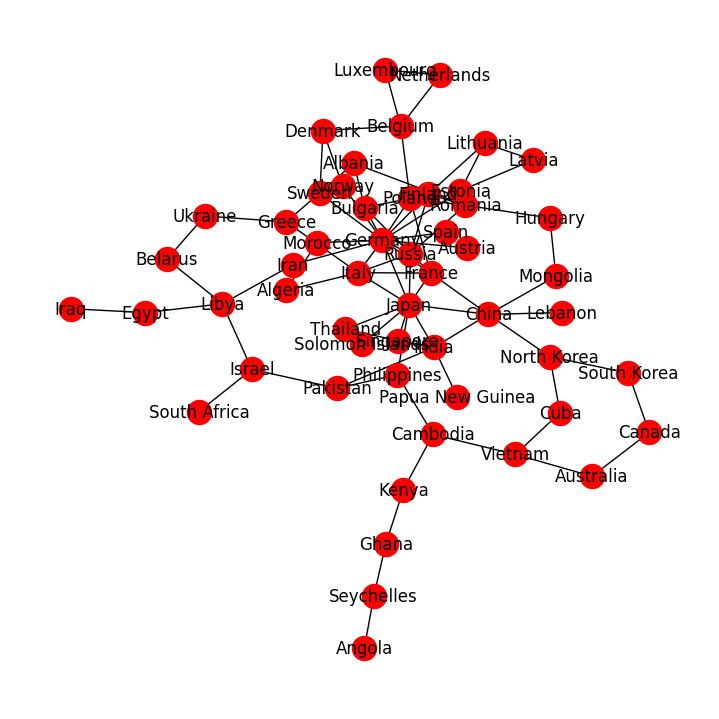

In [5]:
# Plotting graph 
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [6]:
# Saving graph
h.savefig('networkx_plt_country.png')

In [7]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("country.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [8]:
# Applying leiden algorithm 
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'wurlitzer', 'bayanpy', 'infomap'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [9]:
# Assigning type to object 
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [10]:
# Converting coms object to something more readable
new_com = coms.to_node_community_map()

In [29]:
# Displaying object 
new_com

defaultdict(list,
            {'France': [0],
             'Italy': [0],
             'Russia': [0],
             'Germany': [0],
             'Bulgaria': [0],
             'Austria': [0],
             'Spain': [0],
             'Poland': [0],
             'Finland': [0],
             'Albania': [0],
             'Greece': [0],
             'Morocco': [0],
             'Algeria': [0],
             'Romania': [0],
             'Japan': [1],
             'China': [1],
             'Thailand': [1],
             'Singapore': [1],
             'Philippines': [1],
             'Solomon Islands': [1],
             'India': [1],
             'Pakistan': [1],
             'Papua New Guinea': [1],
             'Hungary': [1],
             'Mongolia': [1],
             'Lebanon': [1],
             'Cambodia': [2],
             'Kenya': [2],
             'Ghana': [2],
             'Seychelles': [2],
             'Angola': [2],
             'North Korea': [2],
             'Cuba': [2],
            

In [12]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [13]:
# Displaying dictionary 
dict_com

{'France': 0,
 'Italy': 0,
 'Russia': 0,
 'Germany': 0,
 'Bulgaria': 0,
 'Austria': 0,
 'Spain': 0,
 'Poland': 0,
 'Finland': 0,
 'Albania': 0,
 'Greece': 0,
 'Morocco': 0,
 'Algeria': 0,
 'Romania': 0,
 'Japan': 1,
 'China': 1,
 'Thailand': 1,
 'Singapore': 1,
 'Philippines': 1,
 'Solomon Islands': 1,
 'India': 1,
 'Pakistan': 1,
 'Papua New Guinea': 1,
 'Hungary': 1,
 'Mongolia': 1,
 'Lebanon': 1,
 'Cambodia': 2,
 'Kenya': 2,
 'Ghana': 2,
 'Seychelles': 2,
 'Angola': 2,
 'North Korea': 2,
 'Cuba': 2,
 'South Korea': 2,
 'Canada': 2,
 'Australia': 2,
 'Vietnam': 2,
 'Ukraine': 3,
 'Belarus': 3,
 'Libya': 3,
 'Egypt': 3,
 'Iraq': 3,
 'Israel': 3,
 'South Africa': 3,
 'Iran': 3,
 'Belgium': 4,
 'Netherlands': 4,
 'Luxembourg': 4,
 'Denmark': 4,
 'Norway': 4,
 'Sweden': 4,
 'Estonia': 5,
 'Latvia': 5,
 'Lithuania': 5}

In [14]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("country_communities_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


The network graph's clusters make sense based on history and current connections. 

Central and Eastern European countries are grouped together because of their shared history and economic ties, like the European Union. 

Northern European countries form a cluster due to their historical and economic collaborations. 

The Asian cluster shows strong economic connections, with China being very influential. 

Other clusters, like those in Africa and the Middle East, reflect historical trade routes and current alliances. 

The graph clearly shows the relationships and interactions between these regions.

In [15]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.11320754716981132,
 'Italy': 0.11320754716981132,
 'Russia': 0.1320754716981132,
 'Germany': 0.2641509433962264,
 'Bulgaria': 0.07547169811320754,
 'Austria': 0.018867924528301886,
 'Spain': 0.018867924528301886,
 'Poland': 0.09433962264150943,
 'Estonia': 0.05660377358490566,
 'Latvia': 0.03773584905660377,
 'Lithuania': 0.05660377358490566,
 'Finland': 0.07547169811320754,
 'Belgium': 0.07547169811320754,
 'Netherlands': 0.03773584905660377,
 'Luxembourg': 0.03773584905660377,
 'Denmark': 0.05660377358490566,
 'Norway': 0.03773584905660377,
 'Sweden': 0.03773584905660377,
 'Albania': 0.05660377358490566,
 'Greece': 0.05660377358490566,
 'Ukraine': 0.03773584905660377,
 'Belarus': 0.03773584905660377,
 'Libya': 0.07547169811320754,
 'Egypt': 0.03773584905660377,
 'Iraq': 0.018867924528301886,
 'Japan': 0.18867924528301885,
 'Morocco': 0.03773584905660377,
 'Algeria': 0.03773584905660377,
 'China': 0.11320754716981132,
 'Thailand': 0.03773584905660377,
 'Singapore': 0.0566

In [16]:
# Assigning df
degree_df = pd.DataFrame(degree_dict.items(), columns=['country','centrality'])

In [17]:
# Sorting df 
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

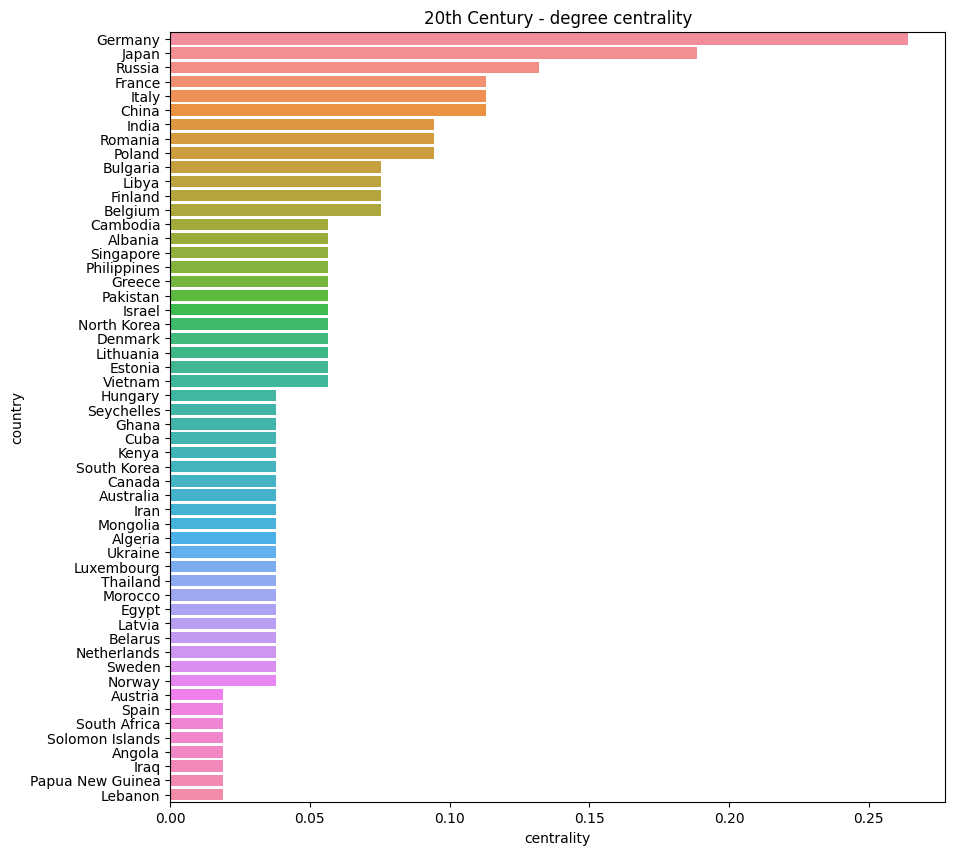

In [18]:
# Plot the degree centrality

plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "country",
    saturation = 0.9, data = degree_df).set_title("20th Century - degree centrality")

Highly Central Countries:
- Germany, Japan, Russia, France, and Italy have the highest degree centrality, indicating they are the most connected and influential countries in the network during the 20th century.


Moderately Central Countries:
- Countries like China, India, Romania, Poland, Bulgaria, Libya, and Belgium show moderate centrality, indicating they have significant but less extensive connections compared to the top countries.

Lesser Central Countries
- The lower end of the centrality spectrum includes countries like Lebanon, Papua New Guinea, Iraq, and Angola, indicating fewer connections and less influence within the network.

There is a large disparity in global influence as shown by the big difference in degree centrality between the countries. 

In [19]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['country','centrality'])

In [20]:
# Sorting df 
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

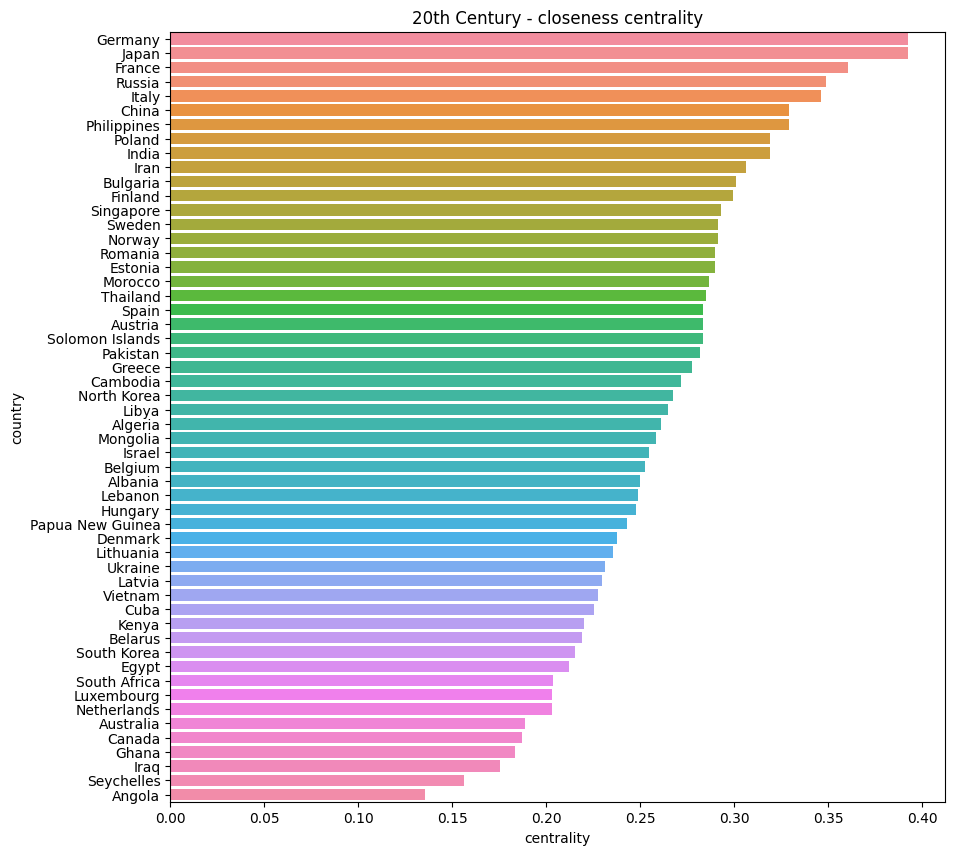

In [21]:
# Plotting closeness centrality 
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "country",
    saturation = 0.9, data = closeness_df).set_title("20th Century - closeness centrality")

Germany, Japan, France, Russia, and Italy have the highest closeness centrality. 
- These countries are the most connected within the country network. 
- These countries have the greatest influence throughout the network to spread information. 
- These countries serve as important hubs for communication, trade, or political influence. 

Ghana, Iraq, Seychelles, and Angola have the lowest closeness centrality.
- These countries have limited influence within the network.

In [22]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['country','centrality'])

In [23]:
# Sorting df 
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

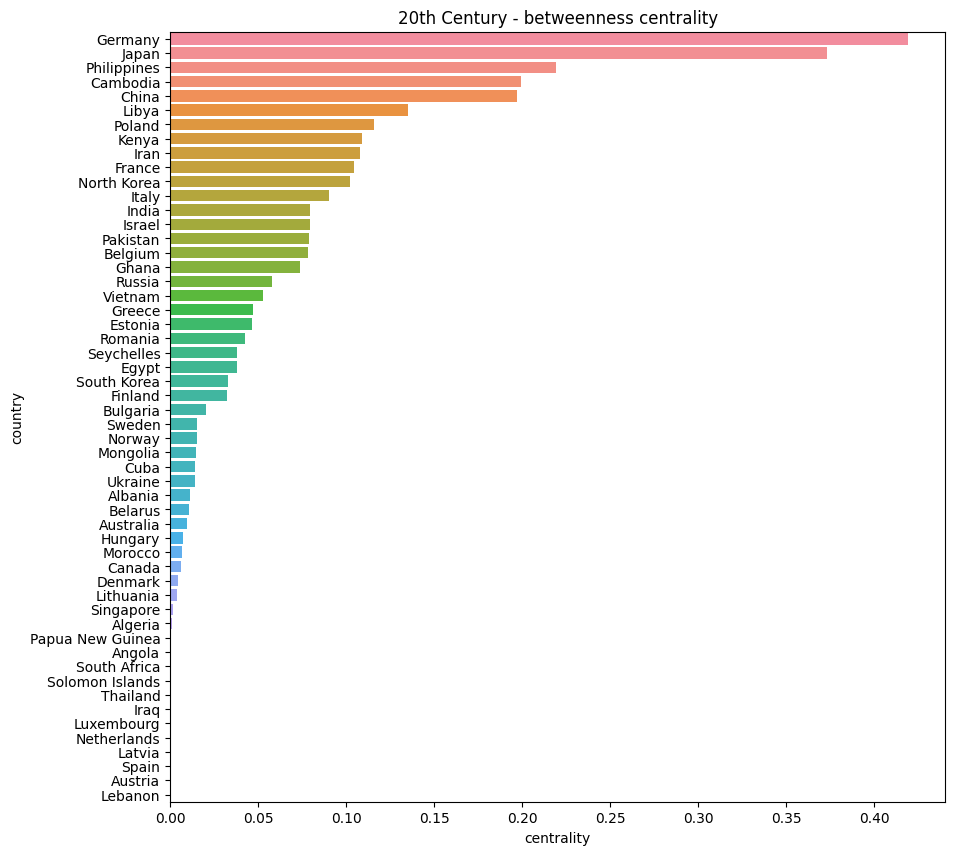

In [24]:
# Plotting betweeness centrality 
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "country",
    saturation = 0.9, data = betweennes_df).set_title("20th Century - betweenness centrality")

Countries on the bottom such as Spain, Austria, and Lebanon with a 0 centrality show that these countries do not serve as a bridge to other countries. 
There aren't any paths between them and other countries.

Germany, Japan, and the Philippines have a high betweenness centrality which indicates that they serve as a bridge or intermediary to a lot of other countries within the network. 

These countries facilitate communication and interaction between other countries.

In [25]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')